In [1]:
import pandas,numpy
import seaborn , matplotlib
%matplotlib inline
import json

In [2]:
import COVID19Py

In [3]:
covid = COVID19Py.COVID19()

In [4]:
covid

In [5]:
covid.getLatest()

{'confirmed': 1511104, 'deaths': 88338, 'recovered': 0}

In [6]:
covid.getLatestChanges()

{'confirmed': 0, 'deaths': 0, 'recovered': 0}

In [7]:
import subprocess , os,sys
temp_file = open("temp.json",'w')

In [8]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/summary'" , shell=True , stdout = temp_file)

0

In [9]:
with open("temp.json",'r') as file:
    output = json.load(file)

In [10]:
len(output['Countries'])

248

In [11]:
numpy.array(list(output['Countries'][100].keys()))

array(['Country', 'CountryCode', 'Slug', 'NewConfirmed', 'TotalConfirmed',
       'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered',
       'Date'], dtype='<U14')

In [12]:
Data = pandas.DataFrame([list(output['Countries'][i].values()) for i in range(len(output['Countries'])) ] ,columns=list(output['Countries'][100].keys()))

In [13]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [14]:
Data.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,afghanistan,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,albania,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,algeria,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [15]:
Data = Data.drop('Slug',axis=1)

In [16]:
Data.head()

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,0,0,0,0,0,0,2020-04-09T18:19:18Z
1,Afghanistan,AF,21,444,0,14,11,29,2020-04-09T18:19:18Z
2,Albania,AL,17,400,0,22,23,154,2020-04-09T18:19:18Z
3,Algeria,DZ,104,1572,12,205,124,237,2020-04-09T18:19:18Z
4,American Samoa,AS,0,0,0,0,0,0,2020-04-09T18:19:18Z


In [17]:
Data = Data.sort_values('TotalConfirmed' , axis=0,ascending=False)

In [18]:
Data.head(10)

,Country,CountryCode,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
236,United States of America,US,32826,429047,1973,14694,1796,23559,2020-04-09T08:36:30Z
208,Spain,ES,6278,148220,747,14792,4813,48021,2020-04-09T08:36:30Z
108,Italy,IT,3836,139422,542,17669,2099,26491,2020-04-09T08:36:30Z
74,France,FR,3894,113959,544,10887,1929,21452,2020-04-09T08:36:30Z
81,Germany,DE,5633,113296,333,2349,10219,46300,2020-04-09T08:36:30Z
45,China,CN,91,82809,2,3337,157,77567,2020-04-09T08:36:30Z
103,"Iran, Islamic Republic of",IR,1997,64586,121,3993,2773,29812,2020-04-09T08:36:30Z
235,United Kingdom,GB,5525,61474,940,7111,20,345,2020-04-09T08:36:30Z
227,Turkey,TR,4117,38226,87,812,264,1846,2020-04-09T08:36:30Z
21,Belgium,BE,1209,23403,205,2240,524,4681,2020-04-09T08:36:30Z


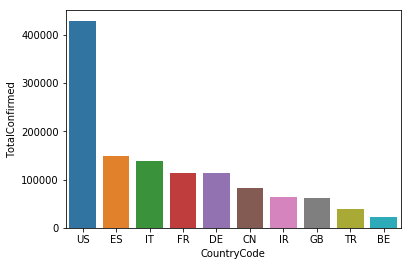

In [19]:
seaborn.barplot(x='CountryCode' , y='TotalConfirmed' , data=Data.head(10))

In [20]:
Cases = list(Data.iloc[1][[3,5,7]])

In [21]:
Cases_key = ['TotalConfirmed' , 'TotalDeaths' , 'TotalRecoved']

In [22]:
import subprocess , os,sys
countries = open("Countries.json",'w')

In [23]:
subprocess.call("curl --location --request GET 'https://api.covid19api.com/countries'" , shell=True , stdout = countries)

0

In [24]:
with open("Countries.json",'r') as file:
    output_countries = json.load(file)

In [25]:
output_countries[0].keys()
#list(output_countries[0].values())
#len(output_countries)

dict_keys(['Country', 'Slug', 'ISO2'])

In [132]:
Countries_DataFrame = pandas.DataFrame([list(output_countries[i].values()) for i in range(len(output_countries)) ] ,columns=list(output_countries[100].keys()))

In [102]:
for country in Countries_DataFrame['Slug']:
    pass
print(len(Countries_DataFrame['Slug']))
URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
print(URL)

248
https://api.covid19api.com/live/country/india/status/confirmed


In [124]:
def Country_Data_Load(value):
    countries_name = open("Country Live Data/"+str(value[0])+".json",'w')
    
    URL = 'https://api.covid19api.com/live/country/'+str(value[1])+'/status/confirmed/date/2020-01-01T00:00:00Z'
    subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_name)
    
    

In [96]:
#URL = 'https://api.covid19api.com/live/country/'+str('india')+'/status/confirmed'
#print(URL)
#countries_india = open("Countries.json",'w')
#subprocess.call("curl --location --request GET "+str(URL)+ "" , shell=True , stdout = countries_india)

https://api.covid19api.com/live/country/india/status/confirmed


0

In [18]:
import subprocess , os,sys
total= open("Total.json",'w')

In [20]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/free-api?global=stats'" , shell=True , stdout = total)

0

In [21]:
with open("Total.json",'r') as file:
    output_Total = json.load(file)


In [22]:
output_Total

{'results': [{'total_cases': 1577364,
   'total_recovered': 348094,
   'total_unresolved': 1096353,
   'total_deaths': 93637,
   'total_new_cases_today': 59404,
   'total_new_deaths_today': 5182,
   'total_active_cases': 1135633,
   'total_serious_cases': 48933,
   'total_affected_countries': 209,
   'source': {'url': 'https://thevirustracker.com/'}}],
 'stat': 'ok'}

In [23]:
V = list(output_Total['results'][0].values())
V=V[:-1]
K = list(output_Total['results'][0].keys())
K = K[:-1]
K

['total_cases',
 'total_recovered',
 'total_unresolved',
 'total_deaths',
 'total_new_cases_today',
 'total_new_deaths_today',
 'total_active_cases',
 'total_serious_cases',
 'total_affected_countries']

In [24]:
Total_Data = pandas.DataFrame([V] , columns=K)

In [25]:
Total_Data

,total_cases,total_recovered,total_unresolved,total_deaths,total_new_cases_today,total_new_deaths_today,total_active_cases,total_serious_cases,total_affected_countries
0,1577364,348094,1096353,93637,59404,5182,1135633,48933,209


In [26]:
Full_Timeline= open("timeline.json",'w')

In [27]:
subprocess.call("curl --location --request GET 'https://thevirustracker.com/timeline/map-data.json'" , shell=True , stdout = Full_Timeline)

0

In [28]:
with open("timeline.json",'r') as file:
    output_Timeline = json.load(file)

In [36]:
countryCode = []

for data in output_Timeline['data']:
    countryCode.append(data['countrycode'])
#output_Timeline['data']

In [37]:
len(set(countryCode))
output_Timeline['data'][0].values()

dict_values(['CN', '1/22/20', '548', '17', '28'])

In [38]:
countryValues = []

for data in output_Timeline['data']:
    countryValues.append(list(data.values()))

In [39]:
Timeline_Dataframe = pandas.DataFrame(countryValues , columns=list(output_Timeline['data'][0].keys()))

In [40]:
Timeline_Dataframe.tail()

,countrycode,date,cases,deaths,recovered
6679,BI,4/06/20,3,0,0
6680,MW,4/06/20,5,0,0
6681,SS,4/06/20,1,0,0
6682,EH,4/06/20,4,0,0
6683,ST,4/06/20,4,0,0


In [34]:
A = Timeline_Dataframe.groupby(by='countrycode')

In [35]:
A.get_group('US')

,countrycode,date,cases,deaths,recovered
5,US,1/22/20,1,0,0
12,US,1/23/20,1,0,0
21,US,1/24/20,2,0,0
32,US,1/25/20,2,0,0
45,US,1/26/20,5,0,0
61,US,1/27/20,5,0,0
77,US,1/28/20,5,0,0
95,US,1/29/20,5,0,0
115,US,1/30/20,5,0,0
139,US,1/31/20,7,0,0


In [44]:
Country_Timeline= open("country_timeline.json",'w')
subprocess.call("curl --location --request GET 'https://api.thevirustracker.com/free-api?countryTimeline=US'" , shell=True , stdout = Country_Timeline)
with open("country_timeline.json",'r') as file:
    output_Country_Timeline = json.load(file)


In [54]:
len(output_Country_Timeline)
output_Country_Timeline['timelineitems'][0]['4/08/20']

{'new_daily_cases': 32829,
 'new_daily_deaths': 1973,
 'total_cases': 429052,
 'total_recoveries': 0,
 'total_deaths': 14695}

In [138]:
Total= open("Total.json",'w')
subprocess.call("curl --location --request GET 'https://corona.lmao.ninja/all'" , shell=True , stdout = Total)
with open("Total.json",'r') as file:
    output_Total = json.load(file)


In [139]:
output_Total

{'updated': 1586463001529,
 'cases': 1587709,
 'todayCases': 69749,
 'deaths': 94888,
 'todayDeaths': 6433,
 'recovered': 353075,
 'active': 1139746,
 'critical': 48943,
 'casesPerOneMillion': 204,
 'deathsPerOneMillion': 12,
 'tests': 12404842,
 'testsPerOneMillion': 1593.9,
 'affectedCountries': 211}

In [140]:
Total_DataFrame = pandas.DataFrame([list(output_Total.values())] , columns=list(output_Total.keys()))

In [141]:
Total_DataFrame

,updated,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,affectedCountries
0,1586463001529,1587709,69749,94888,6433,353075,1139746,48943,204,12,12404842,1593.9,211


In [142]:
import matplotlib.pyplot as plt

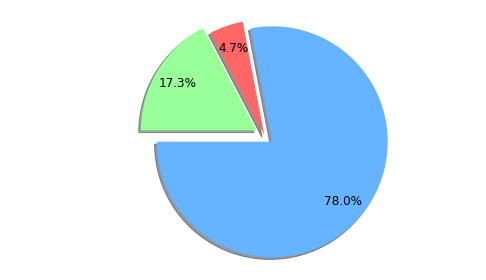

In [143]:
D = []
D.append(list(Total_DataFrame['cases'])[0])
D.append(list(Total_DataFrame['deaths'])[0])
D.append(list(Total_DataFrame['recovered'])[0])

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format


Labels = ['Cases'+' : '+str(D[0]) , 'Deaths'+' : '+str(D[1]) , 'Recovered'+' : '+str(D[0])]
colors = ['#66b3ff','#ff6666','#99ff99']
explode = (0.09, 0, 0.08)
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(D,explode = explode, pctdistance=0.8, colors = colors, autopct = '%1.1f%%',shadow=True,labels=Labels, startangle=180)

for text in texts:
    text.set_color('white')
    text.set_fontsize(13)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [176]:

Countries= open("Countries.json",'w')
subprocess.call("curl --location --request GET 'https://corona.lmao.ninja/countries?sort=country'"  , shell=True , stdout = Countries)
with open("Countries.json",'r') as file:
    output_Countries = json.load(file)

In [207]:
"""
Date_List = []
count = 0
for item in output_Historical:
    Date_List += list(item['timeline']['cases'].keys())
    count+=1
print(count)
"""
output_Countries[0]
Countries_DataFrame1 = pandas.DataFrame([list(output_Countries[i].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0].keys()))

In [208]:
Countries_DataFrame1 = Countries_DataFrame1.drop('countryInfo',axis = 1)

In [209]:
Countries_DataFrame2 = pandas.DataFrame([list(output_Countries[i]['countryInfo'].values()) for i in range(len(output_Countries)) ] ,columns=list(output_Countries[0]['countryInfo'].keys()))

In [216]:
Countries_DataFrame2.head(1)

,_id,iso2,iso3,lat,long,flag
0,716.0,ZW,ZWE,-20.0,30.0,https://raw.githubusercontent.com/NovelCOVID/A...


In [218]:
A = list(Countries_DataFrame2['flag'])
B = list(Countries_DataFrame2['long'])
C = list(Countries_DataFrame2['lat'])
D = list(Countries_DataFrame2['iso3'])
E = list(Countries_DataFrame2['iso2'])
F = list(Countries_DataFrame2['_id'])

Countries_DataFrame1['flag'] = A
Countries_DataFrame1['long'] = B
Countries_DataFrame1['lat'] = C
Countries_DataFrame1['iso3'] = D
Countries_DataFrame1['iso2'] = E
Countries_DataFrame1['_id'] = F

In [220]:
Countries_DataFrame1.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,flag,long,lat,iso3,iso2,_id
0,1586467201618,Zimbabwe,11,0,3,0,0,8,0,0,0,371,25,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-20.0,ZWE,ZW,716.0
1,1586467201613,Zambia,39,0,1,0,24,14,1,2,0,1239,67,https://raw.githubusercontent.com/NovelCOVID/A...,30.0,-15.0,ZMB,ZM,894.0
2,1586467201623,Western Sahara,4,0,0,0,0,4,0,7,0,0,0,https://raw.githubusercontent.com/NovelCOVID/A...,-13.0,24.5,ESH,EH,732.0
3,1586467201606,Vietnam,255,4,0,0,128,127,8,3,0,114241,1174,https://raw.githubusercontent.com/NovelCOVID/A...,106.0,16.0,VNM,VN,704.0
4,1586467201608,Venezuela,171,4,9,0,84,78,6,6,0,139282,4898,https://raw.githubusercontent.com/NovelCOVID/A...,-66.0,8.0,VEN,VE,862.0


In [224]:
Countries_DataFrame = Countries_DataFrame1.sort_values('cases' , ascending=False)

In [225]:
Countries_DataFrame.head()

,updated,country,cases,todayCases,deaths,todayDeaths,recovered,active,critical,casesPerOneMillion,deathsPerOneMillion,tests,testsPerOneMillion,flag,long,lat,iso3,iso2,_id
9,1586467201582,USA,462271,27344,16448,1660,25139,420684,9823,1397,50,2344016,7082,https://raw.githubusercontent.com/NovelCOVID/A...,-97.0000,38.0000,USA,US,840.0
29,1586467201582,Spain,152446,4226,15238,446,52165,85043,7371,3261,326,355000,7593,https://raw.githubusercontent.com/NovelCOVID/A...,-4.0000,40.0000,ESP,ES,724.0
111,1586467201582,Italy,143626,4204,18279,610,28470,96877,3605,2375,302,853369,14114,https://raw.githubusercontent.com/NovelCOVID/A...,12.8333,42.8333,ITA,IT,380.0
141,1586467201582,France,117749,4799,12210,1341,23206,82333,7066,1804,187,333807,5114,https://raw.githubusercontent.com/NovelCOVID/A...,2.0000,46.0000,FRA,FR,250.0
135,1586467201582,Germany,116801,3505,2451,102,52407,61943,4895,1394,29,1317887,15730,https://raw.githubusercontent.com/NovelCOVID/A...,9.0000,51.0000,DEU,DE,276.0
